# Easy Money - Classification

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, \
    roc_curve, plot_confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

from datetime import datetime
from xgboost import XGBClassifier

In [132]:
TARGET = "em_acount"

__DATA_PATH__ = "../../data/processed"
__DATASET__ = f"{__DATA_PATH__}/easy_money_classification.csv"
__MODEL_METRICS_REPORT_PATH__ = "../../reports/model_evaluation_output_.csv"

DEV_PARTITION_PERIOD = ("2018-01-28", "2019-02-28")
VAL_PARTITION_PERIOD = ("2019-03-28", "2019-05-28")

EXCLUDE_COLUMNS = ["pk_cid", "pk_partition"]

## Import data

In [133]:
dtypes = {'pk_cid': 'int64', 'active_customer': 'int8',
          'region_code': 'int8', 'gender': 'int8', 'age': 'int8', 'deceased': 'int8',
          'short_term_deposit': 'int8', 'loans': 'int8', 'mortgage': 'int8',
          'funds': 'int8', 'securities': 'int8', 'long_term_deposit': 'int8',
          'em_account_pp': 'int8', 'credit_card': 'int8', 'payroll': 'int8',
          'pension_plan': 'int8', 'payroll_account': 'int8', 'emc_account': 'int8',
          'debit_card': 'int8', 'em_account_p': 'int8', 'em_acount': 'int8',
          'entry_date_month': 'int8', 'entry_date_year': 'int8', 'entry_date_day': 'int8',
          'entry_date_week': 'int8', 'entry_date_weekday': 'int8', 'entry_date_trim': 'int8',
          'salary': 'float64', 'entry_channel_004': 'int8', 'entry_channel_007': 'int8',
          'entry_channel_013': 'int8', 'entry_channel_KAA': 'int8', 'entry_channel_KAB': 'int8',
          'entry_channel_KAD': 'int8', 'entry_channel_KAE': 'int8', 'entry_channel_KAF': 'int8',
          'entry_channel_KAG': 'int8', 'entry_channel_KAH': 'int8', 'entry_channel_KAI': 'int8',
          'entry_channel_KAJ': 'int8', 'entry_channel_KAK': 'int8', 'entry_channel_KAM': 'int8',
          'entry_channel_KAQ': 'int8', 'entry_channel_KAR': 'int8', 'entry_channel_KAS': 'int8',
          'entry_channel_KAT': 'int8', 'entry_channel_KAW': 'int8', 'entry_channel_KAY': 'int8',
          'entry_channel_KAZ': 'int8', 'entry_channel_KBE': 'int8', 'entry_channel_KBG': 'int8',
          'entry_channel_KBH': 'int8', 'entry_channel_KBO': 'int8', 'entry_channel_KBU': 'int8',
          'entry_channel_KBW': 'int8', 'entry_channel_KBY': 'int8', 'entry_channel_KBZ': 'int8',
          'entry_channel_KCB': 'int8', 'entry_channel_KCC': 'int8', 'entry_channel_KCH': 'int8',
          'entry_channel_KCI': 'int8', 'entry_channel_KCK': 'int8', 'entry_channel_KCL': 'int8',
          'entry_channel_KDA': 'int8', 'entry_channel_KDH': 'int8', 'entry_channel_KDR': 'int8',
          'entry_channel_KDS': 'int8', 'entry_channel_KDT': 'int8', 'entry_channel_KEH': 'int8',
          'entry_channel_KEJ': 'int8', 'entry_channel_KES': 'int8', 'entry_channel_KEY': 'int8',
          'entry_channel_KFA': 'int8', 'entry_channel_KFC': 'int8', 'entry_channel_KFD': 'int8',
          'entry_channel_KFF': 'int8', 'entry_channel_KFK': 'int8', 'entry_channel_KFL': 'int8',
          'entry_channel_KFP': 'int8', 'entry_channel_KFS': 'int8', 'entry_channel_KGC': 'int8',
          'entry_channel_KGN': 'int8', 'entry_channel_KGX': 'int8', 'entry_channel_KHC': 'int8',
          'entry_channel_KHD': 'int8', 'entry_channel_KHE': 'int8', 'entry_channel_KHF': 'int8',
          'entry_channel_KHK': 'int8', 'entry_channel_KHL': 'int8', 'entry_channel_KHM': 'int8',
          'entry_channel_KHN': 'int8', 'entry_channel_KHO': 'int8', 'entry_channel_KHP': 'int8',
          'entry_channel_KHQ': 'int8', 'entry_channel_KHS': 'int8', 'entry_channel_RED': 'int8',
          'entry_channel_UNKNOWN': 'int8', 'segment_00 - OTROS': 'int8',
          'segment_01 - TOP': 'int8', 'segment_02 - PARTICULARES': 'int8',
          'segment_03 - UNIVERSITARIO': 'int8', 'country_id_AR': 'int8', 'country_id_AT': 'int8',
          'country_id_BE': 'int8', 'country_id_BR': 'int8', 'country_id_CA': 'int8',
          'country_id_CH': 'int8', 'country_id_CI': 'int8', 'country_id_CL': 'int8',
          'country_id_CM': 'int8', 'country_id_CN': 'int8', 'country_id_CO': 'int8',
          'country_id_DE': 'int8', 'country_id_DJ': 'int8', 'country_id_DO': 'int8',
          'country_id_DZ': 'int8', 'country_id_ES': 'int8', 'country_id_ET': 'int8',
          'country_id_FR': 'int8', 'country_id_GA': 'int8', 'country_id_GB': 'int8',
          'country_id_GT': 'int8', 'country_id_HU': 'int8', 'country_id_IE': 'int8',
          'country_id_IT': 'int8', 'country_id_JM': 'int8', 'country_id_LU': 'int8',
          'country_id_MA': 'int8', 'country_id_MR': 'int8', 'country_id_MX': 'int8',
          'country_id_NO': 'int8', 'country_id_PE': 'int8', 'country_id_PL': 'int8',
          'country_id_PT': 'int8', 'country_id_QA': 'int8', 'country_id_RO': 'int8',
          'country_id_RU': 'int8', 'country_id_SA': 'int8', 'country_id_SE': 'int8',
          'country_id_SN': 'int8', 'country_id_US': 'int8', 'country_id_VE': 'int8'}

parse_dates = ['pk_partition']

In [134]:
%%time
df = pd.read_csv(__DATASET__, dtype=dtypes, parse_dates=parse_dates)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("entry_date", axis=1, inplace=True)
df["pk_partition"] = pd.to_datetime(df["pk_partition"])
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962838 entries, 0 to 5962837
Columns: 143 entries, pk_cid to country_id_VE
dtypes: datetime64[ns](1), float64(1), int64(1), int8(140)
memory usage: 932.6 MB
Wall time: 42.2 s


In [135]:
df.head(20)

,pk_cid,pk_partition,active_customer,region_code,gender,age,deceased,short_term_deposit,loans,mortgage,...,country_id_PL,country_id_PT,country_id_QA,country_id_RO,country_id_RU,country_id_SA,country_id_SE,country_id_SN,country_id_US,country_id_VE
0,15891,2018-07-28,1,28,1,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15891,2018-08-28,0,28,1,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16063,2018-11-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16063,2018-12-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16063,2019-01-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,16063,2019-02-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,16063,2019-03-28,0,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,16063,2019-04-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,16063,2019-05-28,0,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,16203,2018-12-28,0,8,0,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,5962838.0,1.234933e+06,162293.085772,15891.0,1112533.0,1231097.0,1352339.75,1553689.0
active_customer,5962838.0,4.033799e-01,0.490576,0.0,0.0,0.0,1.00,1.0
region_code,5962838.0,2.580417e+01,13.603136,-1.0,13.0,28.0,36.00,52.0
gender,5962838.0,5.177870e-01,0.499684,0.0,0.0,1.0,1.00,1.0
age,5962838.0,2.976015e+01,11.980074,2.0,22.0,25.0,34.00,105.0
...,...,...,...,...,...,...,...,...
country_id_SA,5962838.0,2.850991e-06,0.001688,0.0,0.0,0.0,0.00,1.0
country_id_SE,5962838.0,2.683286e-06,0.001638,0.0,0.0,0.0,0.00,1.0
country_id_SN,5962838.0,2.850991e-06,0.001688,0.0,0.0,0.0,0.00,1.0
country_id_US,5962838.0,3.270255e-05,0.005719,0.0,0.0,0.0,0.00,1.0


## Classes

In [137]:
class EasyMoneyFilter(BaseEstimator, TransformerMixin):

    def __init__(self, target: str, group_by="pk_cid", sort_value=None):
        if sort_value is None:
            sort_value = ["pk_cid", "pk_partition"]
        self.target = target
        self.group_by = group_by
        self.sort_values = sort_value

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return pd.concat([
            self.get_fist_sales(X),
            self.get_last_no_sales(X)
        ]).sort_values(self.sort_values, ignore_index=True)

    def get_fist_sales(self, X) -> pd.DataFrame:
        first_sale = X.groupby([self.group_by, self.target]).first().reset_index()
        return first_sale[first_sale[self.target] == 1]

    def get_last_no_sales(self, X) -> pd.DataFrame:
        last_no_sale = X.groupby([self.group_by, self.target]).last().reset_index()
        return last_no_sale[last_no_sale[self.target] == 0]


class EasyMoneySplitter:

    def __init__(self, dev_partition_period: tuple, val_partition_period: tuple, exclude_columns):
        self.dev_partition_period = dev_partition_period
        self.val_partition_period = val_partition_period
        self.exclude_columns = exclude_columns

    def get_train_partition(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        return self._get_partition(dataframe, self.dev_partition_period[0], self.dev_partition_period[1])

    def get_validation_partition(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        return self._get_partition(dataframe, self.val_partition_period[0], self.val_partition_period[1])

    def _get_partition(self, dataframe: pd.DataFrame, from_date, to_date) -> pd.DataFrame:
        partition = self._split(dataframe, from_date, to_date)
        return partition.drop(self.exclude_columns, axis=1)

    def _split(self, dataframe: pd.DataFrame, from_date, to_date) -> pd.DataFrame:
        return dataframe[dataframe["pk_partition"].between(from_date, to_date)].reset_index(drop=True)


class Reporter:

    def __init__(self, output_file):
        self.output_file = output_file
        try:
            self.output_df = pd.read_csv(self.output_file, index_col=0)
            self.output_df["date"] = pd.to_datetime(self.output_df["date"])
        except FileNotFoundError:
            self.output_df = pd.DataFrame(columns=[
                "target",
                "target_mean",
                "date",
                "is_overfitted",
                "roc_auc_train",
                "roc_auc_test",
                "roc_auc_val",
                "accuracy_train",
                "accuracy_test",
                "accuracy_val",
                "recall_train",
                "recall_test",
                "recall_val",
                "precision_train",
                "precision_test",
                "precision_val",
                "f1_score_train",
                "f1_score_test",
                "f1_score_val",
                "model"
            ])

    def append_new_evaluation(self, data):
        data["is_overfitted"] = round(abs((data["roc_auc_train"] - data["roc_auc_test"])), 2) > 0
        data["date"] = datetime.now()
        self.output_df = self.output_df.append(data, ignore_index=True)

    def record_evaluation(self, target, model, X_train, y_train, X_test, y_test, X_val, y_val, target_mean):
        train_metrics = get_metrics(model, X_train, y_train)
        test_metrics = get_metrics(model, X_test, y_test)
        val_metrics = get_metrics(model, X_val, y_val)
        report_dict = {
            "target": target,
            "roc_auc_train": train_metrics["roc_auc"],
            "roc_auc_test": test_metrics["roc_auc"],
            "roc_auc_val": val_metrics["roc_auc"],
            "accuracy_train": train_metrics["accuracy"],
            "accuracy_test": test_metrics["accuracy"],
            "accuracy_val": val_metrics["accuracy"],
            "recall_train": train_metrics["recall"],
            "recall_test": test_metrics["recall"],
            "recall_val": val_metrics["recall"],
            "precision_train": train_metrics["precision"],
            "precision_test": test_metrics["precision"],
            "precision_val": val_metrics["precision"],
            "f1_score_train": train_metrics["f1_score"],
            "f1_score_test": test_metrics["f1_score"],
            "f1_score_val": val_metrics["f1_score"],
            "target_mean": target_mean,
            "model": model
        }
        self.append_new_evaluation(report_dict)
        return self.save_csv()

    def save_csv(self):
        self.output_df.drop_duplicates(keep="last", inplace=True)
        self.output_df.to_csv(self.output_file)
        return self.output_df

reporter = Reporter(__MODEL_METRICS_REPORT_PATH__)

## Functions

In [138]:
def hist_plot(dataframe: pd.DataFrame, target: str):
    dataframe[target].hist()
    plt.show()
    print(target)
    return dataframe[target].value_counts()


def relation_with_target(dataframe: pd.DataFrame, field: str, target: str):
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.countplot(data=dataframe, x=field, hue=target)
    plt.show()
    return dataframe.pivot_table(index=field, values=target, aggfunc=[len, sum, np.mean])


def print_metrics(model, X, y):
    prediction = model.predict(X)
    y_score = get_y_score(model, X, y)
    print('AUC Score : ' + str(roc_auc_score(y, y_score)))
    print('Accuracy Score : ' + str(accuracy_score(y, prediction)))
    print('Precision Score : ' + str(precision_score(y, prediction)))
    print('Recall Score : ' + str(recall_score(y, prediction)))
    print('F1 Score : ' + str(f1_score(y, prediction)))
    return confusion_matrix(y, prediction)


def get_y_score(model, X, y) -> pd.DataFrame:
    return pd.DataFrame(model.predict_proba(X)[:, 1], index=y.index, columns=['score'])


def get_metrics(model, X, y):
    prediction = model.predict(X)
    y_score = get_y_score(model, X, y)
    return dict({
        "roc_auc": roc_auc_score(y, y_score),
        "accuracy": accuracy_score(y, prediction),
        "precision": precision_score(y, prediction),
        "recall": recall_score(y, prediction),
        "f1_score": f1_score(y, prediction),
    })

## Filter data

In [139]:
filter = EasyMoneyFilter(TARGET)
df_prep = filter.fit_transform(df)
df_prep

,pk_cid,em_acount,pk_partition,active_customer,region_code,gender,age,deceased,short_term_deposit,loans,...,country_id_PL,country_id_PT,country_id_QA,country_id_RO,country_id_RU,country_id_SA,country_id_SE,country_id_SN,country_id_US,country_id_VE
0,15891,1,2018-07-28,1,28,1,59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15891,0,2018-08-28,0,28,1,59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16063,0,2019-05-28,0,28,1,62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16203,0,2018-12-28,0,8,0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16203,1,2019-01-28,1,8,0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520979,1553685,0,2019-05-28,0,13,0,52,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520980,1553686,0,2019-05-28,0,41,1,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520981,1553687,0,2019-05-28,0,28,0,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520982,1553688,0,2019-05-28,0,39,1,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Target distribution

In [140]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,520984.0,1.281442e+06,179949.661207,15891.0,1149646.75,1295741.0,1428945.25,1553689.0
em_acount,520984.0,6.386511e-01,0.480392,0.0,0.00,1.0,1.00,1.0
active_customer,520984.0,4.031774e-01,0.490536,0.0,0.00,0.0,1.00,1.0
region_code,520984.0,2.593268e+01,13.529693,-1.0,13.00,28.0,36.00,52.0
gender,520984.0,5.051134e-01,0.499974,0.0,0.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
country_id_SA,520984.0,3.838889e-06,0.001959,0.0,0.00,0.0,0.00,1.0
country_id_SE,520984.0,5.758334e-06,0.002400,0.0,0.00,0.0,0.00,1.0
country_id_SN,520984.0,1.919445e-06,0.001385,0.0,0.00,0.0,0.00,1.0
country_id_US,520984.0,2.687223e-05,0.005184,0.0,0.00,0.0,0.00,1.0


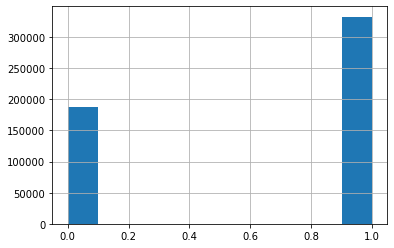

em_acount


1    332727
0    188257
Name: em_acount, dtype: int64

In [141]:
hist_plot(df_prep, TARGET)

<AxesSubplot:xlabel='em_acount', ylabel='age'>

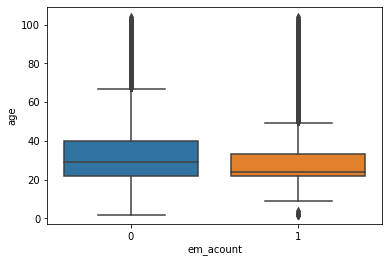

In [142]:
sns.boxplot(data=df_prep, x=TARGET, y="age")

<AxesSubplot:xlabel='em_acount', ylabel='active_customer'>

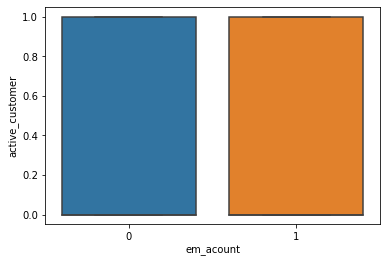

In [143]:
sns.boxplot(data=df_prep, x=TARGET, y="active_customer")

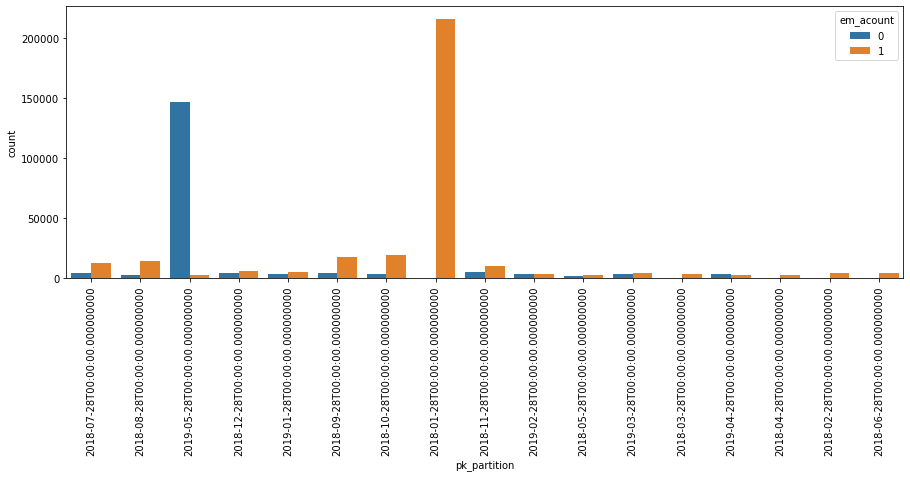

,len,sum,mean
,em_acount,em_acount,em_acount
pk_partition,,,
2018-01-28,215638,215293,0.998400
2018-02-28,4596,4156,0.904265
2018-03-28,3904,3520,0.901639
2018-04-28,3430,3003,0.875510
2018-05-28,4668,3066,0.656812
2018-06-28,5186,4711,0.908407
2018-07-28,16574,12439,0.750513
2018-08-28,16811,14129,0.840462


In [144]:
relation_with_target(df_prep, "pk_partition", TARGET)

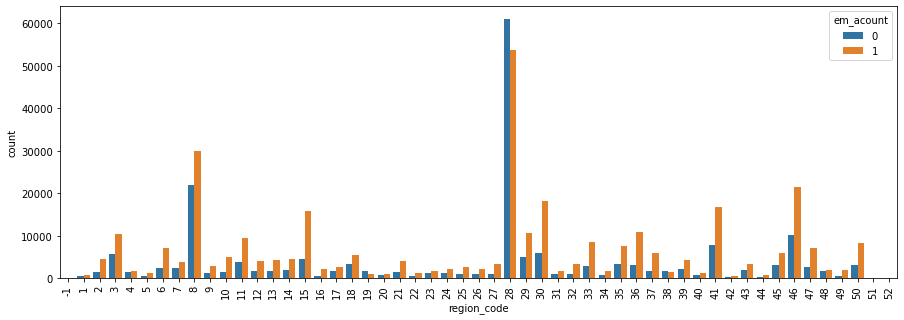

,len,sum,mean
,em_acount,em_acount,em_acount
region_code,,,
-1,173,105,0.606936
1,1282,733,0.571763
2,5967,4462,0.747779
3,15855,10285,0.648691
4,3122,1770,0.566944
5,1782,1244,0.698092
6,9555,7205,0.754055
7,6068,3703,0.610250


In [145]:
relation_with_target(df_prep, "region_code", TARGET)

## Split dataframes

In [146]:
splitter = EasyMoneySplitter(DEV_PARTITION_PERIOD, VAL_PARTITION_PERIOD, EXCLUDE_COLUMNS)

### Train partition

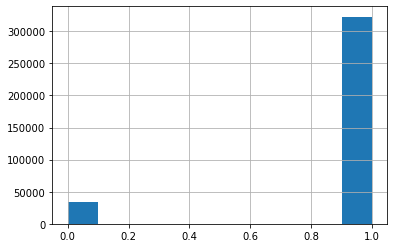

em_acount


1    322647
0     34675
Name: em_acount, dtype: int64

In [147]:
train_df = splitter.get_train_partition(df_prep)
train_size_df = hist_plot(train_df, TARGET)
train_size_df

### Validation partition

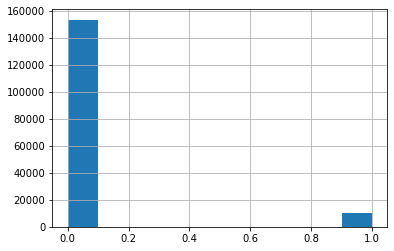

em_acount


0    153582
1     10080
Name: em_acount, dtype: int64

In [148]:
validation_df = splitter.get_validation_partition(df_prep)
hist_plot(validation_df, TARGET)

#### Partitions

In [149]:
dev_X = train_df.drop(TARGET, axis=1)
dev_y = train_df[[TARGET]]

X_val = validation_df.drop(TARGET, axis=1)
y_val = validation_df[[TARGET]]

X_train, X_test, y_train, y_test = train_test_split(dev_X, dev_y, test_size=0.2, random_state=13, stratify=dev_y)

print(f"""
TRAIN:
    X_train.shape: {X_train.shape}
    y_train.shape: {y_train.shape}
TEST:
    X_test.shape: {X_test.shape}
    y_test.shape: {y_test.shape}
VALIDATION:
    X_val.shape: {X_val.shape}
    y_val.shape: {y_val.shape}
""")


TRAIN:
    X_train.shape: (285857, 140)
    y_train.shape: (285857, 1)
TEST:
    X_test.shape: (71465, 140)
    y_test.shape: (71465, 1)
VALIDATION:
    X_val.shape: (163662, 140)
    y_val.shape: (163662, 1)



## Modelling

In [150]:
model: XGBClassifier = XGBClassifier(
    max_depth=3,
    random_state=42,
    use_label_encoder=False
)

eval_set = [(X_test, y_test.values.ravel())]
model.fit(
    X_train,
    y_train.values.ravel(),
    eval_set=eval_set,
    verbose=True,
    eval_metric="auc",
    early_stopping_rounds=10
)

[0]	validation_0-auc:0.81789
[1]	validation_0-auc:0.81789
[2]	validation_0-auc:0.84479
[3]	validation_0-auc:0.85113
[4]	validation_0-auc:0.85805
[5]	validation_0-auc:0.85744
[6]	validation_0-auc:0.85946
[7]	validation_0-auc:0.86637
[8]	validation_0-auc:0.86890
[9]	validation_0-auc:0.86961
[10]	validation_0-auc:0.87120
[11]	validation_0-auc:0.87731
[12]	validation_0-auc:0.88178
[13]	validation_0-auc:0.88340
[14]	validation_0-auc:0.88674
[15]	validation_0-auc:0.88816
[16]	validation_0-auc:0.88876
[17]	validation_0-auc:0.88887
[18]	validation_0-auc:0.88933
[19]	validation_0-auc:0.88982
[20]	validation_0-auc:0.89016
[21]	validation_0-auc:0.89223
[22]	validation_0-auc:0.89529
[23]	validation_0-auc:0.89567
[24]	validation_0-auc:0.89696
[25]	validation_0-auc:0.89794
[26]	validation_0-auc:0.89858
[27]	validation_0-auc:0.89911
[28]	validation_0-auc:0.89985
[29]	validation_0-auc:0.90044
[30]	validation_0-auc:0.90143
[31]	validation_0-auc:0.90172
[32]	validation_0-auc:0.90184
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [151]:
report_df = reporter.record_evaluation(TARGET, model, X_train, y_train, X_test, y_test, X_val, y_val, train_df[TARGET].mean())
report_df.sort_values(by="date", ascending=False)

,target,target_mean,date,is_overfitted,roc_auc_train,roc_auc_test,roc_auc_val,accuracy_train,accuracy_test,accuracy_val,recall_train,recall_test,recall_val,precision_train,precision_test,precision_val,f1_score_train,f1_score_test,f1_score_val,model
4,em_acount,0.902959,2022-04-19 00:17:38.079380,False,0.911341,0.911024,0.786666,0.940705,0.940278,0.391374,0.987060,0.986936,0.869544,0.949290,0.948966,0.081871,0.967807,0.967579,0.149651,"XGBClassifier(base_score=0.5, booster='gbtree'..."
3,em_acount,0.902959,2022-04-18 23:58:02.303149,False,0.911341,0.911024,0.786666,0.940705,0.940278,0.391374,0.987060,0.986936,0.869544,0.949290,0.948966,0.081871,0.967807,0.967579,0.149651,"XGBClassifier(base_score=0.5, booster='gbtree'..."
2,em_acount,0.902959,2022-04-18 23:53:05.782910,False,0.911341,0.911024,0.786666,0.940705,0.940278,0.391374,0.987060,0.986936,0.869544,0.949290,0.948966,0.081871,0.967807,0.967579,0.149651,"XGBClassifier(base_score=0.5, booster='gbtree'..."
1,em_acount,0.902959,2022-04-18 23:14:19.981752,False,0.911341,0.911024,0.786666,0.940705,0.940278,0.391374,0.987060,0.986936,0.869544,0.949290,0.948966,0.081871,0.967807,0.967579,0.149651,"XGBClassifier(base_score=0.5, booster='gbtree'..."
0,em_acount,0.902959,2022-04-18 23:13:01.398115,True,0.927557,0.918854,0.799408,0.943958,0.941804,0.402696,0.986897,0.986192,0.869246,0.952733,0.951156,0.083289,0.969514,0.968357,0.152012,"XGBClassifier(base_score=0.5, booster='gbtree'..."


Text(0, 0.5, 'TPR')

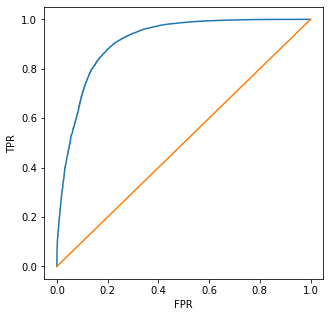

In [152]:
fpr, tpr, th = roc_curve(y_test, get_y_score(model, X_test, y_test))
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')

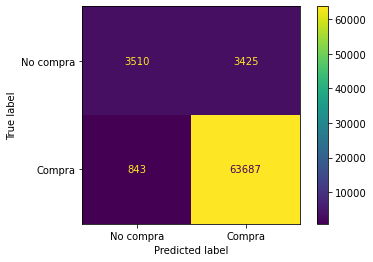

In [153]:
plot_confusion_matrix(model, X_test, y_test, values_format="d", display_labels=["No compra", "Compra"])
plt.show()

<AxesSubplot:>

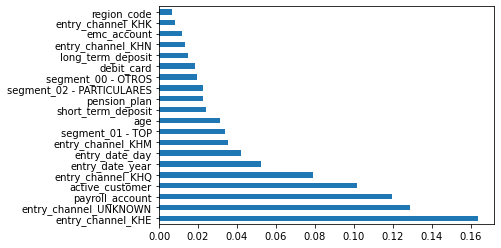

In [154]:
feat_importances = pd.Series(model.feature_importances_, index=dev_X.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Conclusions

In [155]:
columns = [
    "target",
    "target_mean",
    "roc_auc_test",
    "roc_auc_val",
    "accuracy_test",
    "accuracy_val",
    "recall_test",
    "recall_val",
    "precision_test",
    "precision_val",
    "f1_score_test",
    "f1_score_val",
]
report_df.tail(1)[columns].T

,4
target,em_acount
target_mean,0.902959
roc_auc_test,0.911024
roc_auc_val,0.786666
accuracy_test,0.940278
accuracy_val,0.391374
recall_test,0.986936
recall_val,0.869544
precision_test,0.948966
precision_val,0.081871
